# Reproducing Hans Rosling plot

https://seaborn.pydata.org/examples/scatter_bubbles.html

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('./datos/world/countries.csv')

In [41]:
df['country']

0      Afghanistan
1          Albania
2          Algeria
3          Andorra
4           Angola
          ...     
182        Vietnam
183      Palestine
184          Yemen
185         Zambia
186       Zimbabwe
Name: country, Length: 187, dtype: object

In [42]:
df.health = df.health.str.replace(',','.').astype('float')

In [43]:
df

,country,region,income,health,population
0,Afghanistan,Europe & Central Asia,1925,57.63,32526562
1,Albania,Europe & Central Asia,10620,76.00,2896679
2,Algeria,Middle East & North Africa,13434,76.50,39666519
3,Andorra,Europe & Central Asia,46577,84.10,70473
4,Angola,Sub-Saharan Africa,7615,61.00,25021974
...,...,...,...,...,...
182,Vietnam,South Asia,5623,76.50,93447601
183,Palestine,Middle East & North Africa,4319,75.20,4668466
184,Yemen,Middle East & North Africa,3887,67.60,26832215
185,Zambia,Sub-Saharan Africa,4034,58.96,16211767


In [44]:
help(sns.scatterplot)

Help on function scatterplot in module seaborn.relational:

scatterplot(data=None, *, x=None, y=None, hue=None, size=None, style=None, palette=None, hue_order=None, hue_norm=None, sizes=None, size_order=None, size_norm=None, markers=True, style_order=None, legend='auto', ax=None, **kwargs)
    Draw a scatter plot with possibility of several semantic groupings.
    
    The relationship between `x` and `y` can be shown for different subsets
    of the data using the `hue`, `size`, and `style` parameters. These
    parameters control what visual semantics are used to identify the different
    subsets. It is possible to show up to three dimensions independently by
    using all three semantic types, but this style of plot can be hard to
    interpret and is often ineffective. Using redundant semantics (i.e. both
    `hue` and `style` for the same variable) can be helpful for making
    graphics more accessible.
    
    See the :ref:`tutorial <relational_tutorial>` for more information.


<AxesSubplot: xlabel='income', ylabel='health'>

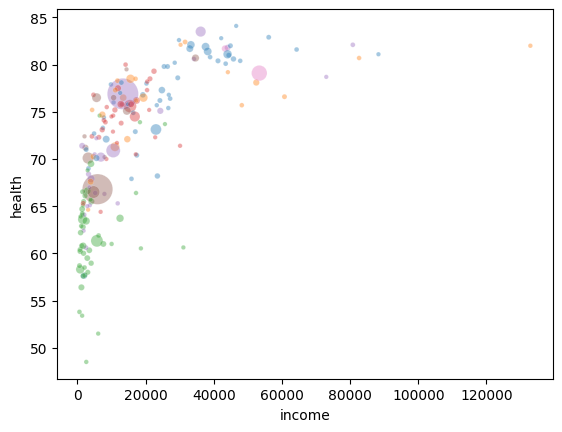

In [52]:
sns.scatterplot(df, x='income', y='health', size='population', hue='region', 
                legend=None, sizes=(10,500), alpha=0.4)

In [53]:
import plotly.express as px

In [55]:
px.scatter(df, x='income', y='health', color='region', size='population')

In [6]:
import geopandas as gpd

In [7]:
geo = gpd.read_file('./datos/world/countries.geojson')

In [10]:
geo

,ADMIN,ISO_A3,ISO_A2,geometry
0,Aruba,ABW,AW,"MULTIPOLYGON (((-69.99694 12.57758, -69.93639 ..."
1,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38..."
2,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -..."
3,Anguilla,AIA,AI,"MULTIPOLYGON (((-63.03767 18.21296, -63.09952 ..."
4,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42..."
...,...,...,...,...
250,Samoa,WSM,WS,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564..."
251,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12..."
252,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -..."
253,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8..."


In [18]:
geo.merge(df, right_on='country', left_on='ADMIN')

,ADMIN,ISO_A3,ISO_A2,geometry,country,region.value,income,health,population
0,Afghanistan,AFG,AF,"MULTIPOLYGON (((71.04980 38.40866, 71.05714 38...",Afghanistan,Europe & Central Asia,1925,"57,63",32526562
1,Angola,AGO,AO,"MULTIPOLYGON (((11.73752 -16.69258, 11.73851 -...",Angola,Sub-Saharan Africa,7615,61,25021974
2,Albania,ALB,AL,"MULTIPOLYGON (((19.74777 42.57890, 19.74601 42...",Albania,Europe & Central Asia,10620,76,2896679
3,Andorra,AND,AD,"MULTIPOLYGON (((1.70701 42.50278, 1.69750 42.4...",Andorra,Europe & Central Asia,46577,"84,1",70473
4,United Arab Emirates,ARE,AE,"MULTIPOLYGON (((53.86305 24.23469, 53.88860 24...",United Arab Emirates,Middle East & North Africa,60749,"76,6",9156963
...,...,...,...,...,...,...,...,...,...
182,Samoa,WSM,WS,"MULTIPOLYGON (((-171.57002 -13.93816, -171.564...",Samoa,East Asia & Pacific,5558,"72,2",193228
183,Yemen,YEM,YE,"MULTIPOLYGON (((53.30824 12.11839, 53.31027 12...",Yemen,Middle East & North Africa,3887,"67,6",26832215
184,South Africa,ZAF,ZA,"MULTIPOLYGON (((37.86378 -46.94085, 37.83644 -...",South Africa,Sub-Saharan Africa,12509,"63,72",54490406
185,Zambia,ZMB,ZM,"MULTIPOLYGON (((31.11984 -8.61663, 31.14102 -8...",Zambia,Sub-Saharan Africa,4034,"58,96",16211767
